<a href="https://colab.research.google.com/github/vandal1233/hello-world/blob/master/Catelog_Marketing_Tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [2]:
Direct_Marketing=pd.read_excel("https://github.com/SavioSal/datasets/raw/master/Catalog%20Marketing.xlsx")
df=Direct_Marketing.copy()
df.head(25)

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,History,Catalogs,Region,State,City,First Purchase,Amount Spent
0,1,1,0,0,0,1,16400,1,1.0,12,South,Florida,Orlando,2014-10-23,217.691
1,2,2,0,1,1,0,108100,3,3.0,18,Midwest,Illinois,Chicago,2012-05-25,2632.462
2,3,2,1,1,1,1,97300,1,NaN,12,South,Florida,Orlando,2018-08-18,3047.563
3,4,3,1,1,1,1,26800,0,1.0,12,East,Ohio,Cleveland,2015-12-26,434.606
4,5,1,1,0,0,1,11200,0,NaN,6,Midwest,Illinois,Chicago,2018-08-04,105.624
5,6,2,0,0,0,1,42800,0,2.0,12,West,Arizona,Phoenix,2016-03-04,758.649
6,7,2,0,0,0,1,34700,0,NaN,18,Midwest,Kansas,Kansas City,2018-06-11,1614.512
7,8,3,0,1,1,0,80000,0,3.0,6,West,California,San Francisco,2012-08-17,1984.660
8,9,2,1,1,0,1,60300,0,NaN,24,Midwest,Illinois,Chicago,2018-05-29,2091.422
9,10,3,1,1,1,0,62300,0,3.0,24,South,Florida,Orlando,2014-06-09,2644.418


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Person          1000 non-null   int64         
 1   Age             1000 non-null   int64         
 2   Gender          1000 non-null   int64         
 3   Own Home        1000 non-null   int64         
 4   Married         1000 non-null   int64         
 5   Close           1000 non-null   int64         
 6   Salary          1000 non-null   int64         
 7   Children        1000 non-null   int64         
 8   History         697 non-null    float64       
 9   Catalogs        1000 non-null   int64         
 10  Region          1000 non-null   object        
 11  State           1000 non-null   object        
 12  City            1000 non-null   object        
 13  First Purchase  1000 non-null   datetime64[ns]
 14  Amount Spent    1000 non-null   float64       
dtypes: da

In [ ]:
df.dtypes

Person                     int64
Age                        int64
Gender                     int64
Own Home                   int64
Married                    int64
Close                      int64
Salary                     int64
Children                   int64
History                  float64
Catalogs                   int64
Region                    object
State                     object
City                      object
First Purchase    datetime64[ns]
Amount Spent             float64
dtype: object

In [ ]:
df.shape

(1000, 15)

In [ ]:
df[df.duplicated() == True]

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,History,Catalogs,Region,State,City,First Purchase,Amount Spent


In [ ]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'City': ['Orlando',
  'Chicago',
  'Cleveland',
  'Phoenix',
  'Kansas City',
  'San Francisco',
  'Buffalo',
  'Salt Lake City',
  'New Orleans',
  'Los Angeles',
  'Philadelphia',
  'Memphis',
  'Seattle',
  'Miami',
  'St. Louis',
  'Houston',
  'Cincinnati',
  'Boston',
  'New York',
  'Louisville',
  'Indianapolis',
  'Denver',
  'Pittsburgh',
  'Dallas'],
 'Region': ['South', 'Midwest', 'East', 'West'],
 'State': ['Florida',
  'Illinois',
  'Ohio',
  'Arizona',
  'Kansas',
  'California',
  'New York',
  'Utah',
  'Louisiana',
  'Pennsylvania',
  'Tennessee',
  'Washington',
  'Missouri',
  'Texas',
  'Massachusetts',
  'Kentucky',
  'Indiana',
  'Colorado']}

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

Person              0
Age                 0
Gender              0
Own Home            0
Married             0
Close               0
Salary              0
Children            0
History           303
Catalogs            0
Region              0
State               0
City                0
First Purchase      0
Amount Spent        0
dtype: int64

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
History,303,30.3
Person,0,0.0
Age,0,0.0
Gender,0,0.0
Own Home,0,0.0
Married,0,0.0
Close,0,0.0
Salary,0,0.0
Children,0,0.0
Catalogs,0,0.0


In [ ]:
df.corr()

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,History,Catalogs,Amount Spent
Person,1.000000,-0.034690,-0.020093,-0.015693,0.015408,-0.037614,0.013182,0.002295,0.021056,-0.040440,0.001910
Age,-0.034690,1.000000,0.001459,0.428897,0.255993,0.013350,0.384719,-0.271118,0.395073,0.124460,0.348248
Gender,-0.020093,0.001459,1.000000,0.084433,0.116057,0.005554,0.261492,-0.105469,0.274855,0.087351,0.201687
Own Home,-0.015693,0.428897,0.084433,1.000000,0.264009,0.033691,0.460736,-0.032274,0.382031,0.093132,0.350811
Married,0.015408,0.255993,0.116057,0.264009,1.000000,0.006964,0.675633,0.009770,0.482053,0.137060,0.475879
Close,-0.037614,0.013350,0.005554,0.033691,0.006964,1.000000,0.037127,-0.002391,-0.232452,-0.128581,-0.252622
Salary,0.013182,0.384719,0.261492,0.460736,0.675633,0.037127,1.000000,0.049663,0.697616,0.183551,0.699598
Children,0.002295,-0.271118,-0.105469,-0.032274,0.009770,-0.002391,0.049663,1.000000,-0.403087,-0.113455,-0.222302
History,0.021056,0.395073,0.274855,0.382031,0.482053,-0.232452,0.697616,-0.403087,1.000000,0.359897,0.766673
Catalogs,-0.040440,0.124460,0.087351,0.093132,0.137060,-0.128581,0.183551,-0.113455,0.359897,1.000000,0.472644


Correlation Matrix


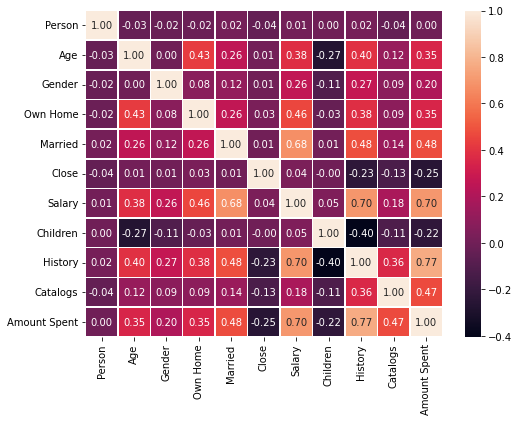

In [ ]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='rocket',linewidths=.5,fmt=".2f",annot = True);

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person,1000.0,500.500000,288.819436,1.000,250.75000,500.5000,750.25000,1000.000
Age,1000.0,1.918000,0.696966,1.000,1.00000,2.0000,2.00000,3.000
Gender,1000.0,0.494000,0.500214,0.000,0.00000,0.0000,1.00000,1.000
Own Home,1000.0,0.516000,0.499994,0.000,0.00000,1.0000,1.00000,1.000
Married,1000.0,0.502000,0.500246,0.000,0.00000,1.0000,1.00000,1.000
Close,1000.0,0.710000,0.453989,0.000,0.00000,1.0000,1.00000,1.000
Salary,1000.0,56103.900000,30616.314826,10100.000,29975.00000,53700.0000,77025.00000,168800.000
Children,1000.0,0.934000,1.051070,0.000,0.00000,1.0000,2.00000,3.000
History,697.0,2.035868,0.833997,1.000,1.00000,2.0000,3.00000,3.000
Catalogs,1000.0,14.682000,6.622895,6.000,6.00000,12.0000,18.00000,24.000


In [ ]:
df_Age=df['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'count'})
df_Age

,Age,count
0,2,508
1,1,287
2,3,205


1. Most customers are in the middle age group


In [ ]:
df_Age=df['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'count'})


fig = go.Figure([go.Pie(labels=df_Age['Age'], values=df_Age['count'], pull=[0.2,0,0],hole=0.6)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Age Distribution",title_x=0.3)
fig.show()

In [ ]:
df_Age=df['Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Age','Age':'count'})

fig = go.Figure(go.Bar(
    x=df_Age['Age'],y=df_Age['count'],
    marker={'color': df_Age['count'], 
    'colorscale': 'magma'},  
    text=df_Age['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Age Distribution',xaxis_title="Age",yaxis_title="Count ",title_x=0.5)
fig.show()

In [ ]:
df_Age_Salary=df.groupby(by =['Age'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Age_AmountSpent=df.groupby(by =['Age'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Age':'Age1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Age_Salary,df_Age_AmountSpent], axis=1)
result.drop(['Age1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Age,AVG_Salary,AVG_AmountSpent
0,1,27715.68,558.62
1,2,72036.42,1501.69
2,3,56365.85,1432.13


In [ ]:
df_Age_Salary=df.groupby(by =['Age'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Age_AmountSpent=df.groupby(by =['Age'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Age':'Age1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Age_Salary,df_Age_AmountSpent], axis=1)
result.drop(['Age1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Age AVG Salary ",
                                   "Age AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Age'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Age'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Age ",title_x=0.5)
fig.show()

1. Middle age group earns more and spends more {1 is young, 2 is middle, 3 is old}

In [ ]:
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",
                 color='Age') # Added color to basic scatter
fig.update_layout(title='Age With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

1. Most of the customers are in the middle age group
2. Middle age group earns more and spends more

In [ ]:
df_Gender=df['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})
df_Gender

,Gender,count
0,0,506
1,1,494


In [ ]:
fig = go.Figure(go.Bar(
    x=df_Gender['Gender'],y=df_Gender['count'],
    marker={'color': df_Gender['count'], 
    'colorscale': 'Viridis'},  
    text=df_Gender['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Gender Distribution',xaxis_title="Gender",yaxis_title="Count ",title_x=0.5)
fig.show()

In [ ]:
#How much is the average salary,amount spent by Gender
df_Gender_Salary=df.groupby(by =['Gender'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Gender_AmountSpent=df.groupby(by =['Gender'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Gender_Salary,df_Gender_AmountSpent], axis=1)
result.drop(['Gender1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Gender AVG Salary ",
                                   "Gender AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Gender'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Gender ",title_x=0.5)
fig.show()

1. Men earn more and spend more considered{0 as women and 1 as men as goes along in whole dataset}


In [ ]:
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",
                 color='Gender') 
fig.update_layout(title='Gender With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [ ]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Married'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Married':'count'})
df_G_and_A

,Gender,Age,count
0,0,1,171
1,0,2,206
2,0,3,129
3,1,1,116
4,1,2,302
5,1,3,76


1. The highest number of customers is middle age men
2. Lowest number of customers older men

In [ ]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Married'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Married':'count'})

fig = px.bar(df_G_and_A, x="Age", y="count",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Age Count With Gender',title_x=0.5,yaxis_title="Count",
                 )
fig.show()

In [3]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Amount Spent':'AVG_AmountSpent'})
df_G_and_A["AVG_AmountSpent"]=df_G_and_A["AVG_AmountSpent"].map(lambda x:round(x,2))
df_G_and_A

,Gender,Age,AVG_AmountSpent
0,0,1,501.27
1,0,2,1301.34
2,0,3,1279.30
3,1,1,643.18
4,1,2,1638.35
5,1,3,1691.53


1. Highest average spending:Male Old 1691
2. Lowest average spending: Female Young 501

In [ ]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Amount Spent':'AVG_AmountSpent'})
df_G_and_A["AVG_AmountSpent"]=df_G_and_A["AVG_AmountSpent"].map(lambda x:round(x,2))

fig = px.bar(df_G_and_A, x="Age", y="AVG_AmountSpent",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Age Amount Spent With Gender,Age',title_x=0.5,yaxis_title="Amount Spent",
                 )
fig.show()

In [ ]:
df_age_gender_agg=df.groupby(by=["Age","Gender"])['Amount Spent'].agg(["min","mean","max"])
df_age_gender_agg

min         mean       max
Age Gender                                
1   0        46.550   501.265854  3688.445
    1        37.807   643.178310  1692.379
2   0       157.531  1301.335762  5829.655
    1       156.772  1638.347563  5877.734
3   0        64.839  1279.304837  5564.127
    1       297.297  1691.529776  6217.343

In [ ]:
df_age_gender_agg=df.groupby(by=["Age","Gender"])['Salary'].agg(["min","mean","max"])
df_age_gender_agg

min          mean     max
Age Gender                             
1   0       10200  25485.380117   79400
    1       10200  31003.448276   80700
2   0       25300  65787.864078  135700
    1       34200  76298.675497  140700
3   0       10100  50213.953488  128700
    1       15400  66807.894737  168800

1. Gender distribution is balanced
2. Men earn more and spend more
3. The highest number of customers is middle age men
4. Lowest number of customers older men

In [ ]:
df_OwnHome=df['Own Home'].value_counts().to_frame().reset_index().rename(columns={'index':'Own Home','Own Home':'count'})
df_OwnHome

,Own Home,count
0,1,516
1,0,484


0 own home
1 rent

In [4]:
df_OwnHome=df['Own Home'].value_counts().to_frame().reset_index().rename(columns={'index':'Own Home','Own Home':'count'})

colors=['blue',"cyan"]

fig = go.Figure([go.Pie(labels=df_OwnHome['Own Home'], values=df_OwnHome['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Own Home  Count",title_x=0.5)
fig.show()

1. OwnHome distribution is balanced

In [ ]:
df_OwnHome_Salary=df.groupby(by =['Own Home'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_OwnHome_AmountSpent=df.groupby(by =['Own Home'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Own Home':'OwnHome1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_OwnHome_Salary,df_OwnHome_AmountSpent], axis=1)
result.drop(['OwnHome1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Own Home,AVG_Salary,AVG_AmountSpent
0,0,41546.28,868.82
1,1,69758.72,1543.14


In [ ]:
df_OwnHome_Salary=df.groupby(by =['Own Home'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_OwnHome_AmountSpent=df.groupby(by =['Own Home'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Own Home':'OwnHome1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_OwnHome_Salary,df_OwnHome_AmountSpent], axis=1)
result.drop(['OwnHome1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Own Home AVG Salary ",
                                   "Own Home AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Own Home'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Own Home'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Own Home",title_x=0.5)
fig.show()

1. Homeowners earn more and spend more

In [ ]:
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",color='Own Home')
fig.update_layout(title='Own Home With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

1. Own Home distribution is balanced
2. Homeowners earn more and spend more

In [5]:
df_Married=df['Married'].value_counts().to_frame().reset_index().rename(columns={'index':'Married','Married':'count'})

colors=['lightblue',"yellow"]

fig = go.Figure([go.Pie(labels=df_Married['Married'], values=df_Married['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Married  Count",title_x=0.5)
fig.show()

0 is single
1 is married

1. Married distribution is balanced


In [ ]:
df_Married_Salary=df.groupby(by =['Married'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Married_AmountSpent=df.groupby(by =['Married'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Married':'Married1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Married_Salary,df_Married_AmountSpent], axis=1)
result.drop(['Married1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Married,AVG_Salary,AVG_AmountSpent
0,0,35345.98,757.81
1,1,76696.41,1672.07


In [ ]:
df_Married_Salary=df.groupby(by =['Married'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Married_AmountSpent=df.groupby(by =['Married'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Married':'Married1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Married_Salary,df_Married_AmountSpent], axis=1)
result.drop(['Married1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Married AVG Salary ",
                                   "Married AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Married'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Married'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Married ",title_x=0.5)
fig.show()

1. Married people earn more and spend more

In [ ]:
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",
                 color='Married')
fig.update_layout(title='Married With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()



*   Married distribution is balanced
*   Married people earn more and spend more



In [ ]:
df_Location=df['Close'].value_counts().to_frame().reset_index().rename(columns={'index':'Close','Close':'count'})

fig = go.Figure(go.Bar(
    x=df_Location['Close'],y=df_Location['count'],
    marker={'color': df_Location['count'], 
    'colorscale': 'Viridis'},  
    text=df_Location['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Location Distribution',xaxis_title="Location",yaxis_title="Count ",title_x=0.5)
fig.show()

1. 0 is far and 1 is close
2. Most customers are close to the nearest physical store that sells similar products.

In [6]:
df_Location_Salary=df.groupby(by =['Close'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Location_AmountSpent=df.groupby(by =['Close'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Close':'Location1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Location_Salary,df_Location_AmountSpent], axis=1)
result.drop(['Location1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Close,AVG_Salary,AVG_AmountSpent
0,0,54326.21,1596.47
1,1,56830.00,1061.68


In [7]:
df_Location_Salary=df.groupby(by =['Close'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Location_AmountSpent=df.groupby(by =['Close'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Close':'Location1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Location_Salary,df_Location_AmountSpent], axis=1)
result.drop(['Location1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Location AVG Salary ",
                                   "Location AVG Amount Spent " ))
                                  

fig.add_trace(go.Bar(
    x=result['Close'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Close'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Location ",title_x=0.5)
fig.show()

1. Customers who are close to the nearest physical store selling similar products have lower expenses, although their income is higher

In [ ]:
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",
                 color='Close') 
fig.update_layout(title='Location With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

1. Most customers are close to the nearest physical store that sells similar products
2. Customers who are close to the nearest physical store selling similar products have lower spend, although their income is higher

In [ ]:
df_Children=df['Children'].value_counts().to_frame().reset_index().rename(columns={'index':'Children','Children':'count'})
df_Children

,Children,count
0,0,462
1,1,267
2,2,146
3,3,125


In [8]:
df_Children=df['Children'].value_counts().to_frame().reset_index().rename(columns={'index':'Children','Children':'count'})

colors=['darkblue',"yellow","red","orange"]

fig = go.Figure([go.Pie(labels=df_Children['Children'], values=df_Children['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Children  Count",title_x=0.5)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=df_Children['Children'], y=df_Children['count'],
    mode='markers',
    marker=dict(
        color=df_Children['count'],
        size=df_Children['count']*0.1, # Multiplying by 0.3 to reduce size and stay uniform accross all points
        showscale=True
    ))])

fig.update_layout(title='Children Distribution ',xaxis_title="Children Count  ",yaxis_title="Number Of Customers ",title_x=0.5)
fig.show()

1. 46 percent of customers don't have Children
2. What are the customers' average income and expenses by Children?

In [9]:
df_Children_Salary=df.groupby(by =['Children'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Children_AmountSpent=df.groupby(by =['Children'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Children':'Children1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Children_Salary,df_Children_AmountSpent], axis=1)
result.drop(['Children1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Children,AVG_Salary,AVG_AmountSpent
0,0,54896.32,1406.63
1,1,56125.09,1219.56
2,2,56554.79,940.74
3,3,59995.20,831.49


In [10]:
df_Children_Salary=df.groupby(by =['Children'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Children_AmountSpent=df.groupby(by =['Children'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Children':'Children1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Children_Salary,df_Children_AmountSpent], axis=1)
result.drop(['Children1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Children AVG Salary ",
                                   "Children AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Children'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Children'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = "Children ",title_x=0.5)
fig.show()

1. Although customers' incomes were close, there was a decrease in spending as the number of children increased

In [11]:
df['Children']=df['Children'].astype('object')
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",
                 color='Children')
fig.update_layout(title='Children With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

1. 46 percent of customers don't have Children
2. Although customers' incomes were close, there was a decrease in spending as the number of children increased

In [ ]:
df_missing=df.copy()
df_History=df_missing['History'].value_counts().to_frame().reset_index().rename(columns={'index':'History','History':'count'})
df_History

,History,count
0,3.0,255
1,1.0,230
2,2.0,212


In [ ]:
df_missing["History"]=df_missing["History"].fillna("None")

In [ ]:
df_History=df_missing['History'].value_counts().to_frame().reset_index().rename(columns={'index':'History','History':'count'})
df_History

,History,count
0,None,303
1,3.0,255
2,1.0,230
3,2.0,212


In [ ]:
df_History=df_missing['History'].value_counts().to_frame().reset_index().rename(columns={'index':'History','History':'count'})

fig = go.Figure(go.Bar(
    x=df_History['History'],y=df_History['count'],
    marker={'color': df_History['count'], 
    'colorscale': 'Viridis'},  
    text=df_History['count'],
    textposition = "outside",
))
fig.update_layout(title_text='History Distribution',xaxis_title="History",yaxis_title="Count ",title_x=0.5)
fig.show()

3 - High
2 - Medium
1 - Low

1. The highest number of customers who prefer us for the first time

In [ ]:
df_History_Salary=df_missing.groupby(by =['History'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_History_AmountSpent=df_missing.groupby(by =['History'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'History':'History1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_History_Salary,df_History_AmountSpent], axis=1)
result.drop(['History1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("History AVG Salary ",
                                   "History AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['History'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'balance'},  
    text=result['AVG_Salary'],
    textposition = "inside"
    ),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['History'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'balance'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = " History ",title_x=0.5,
                 hoverlabel=dict(
                  bgcolor="white",
                  font_size=16))
fig.show()

1. Customers with high previous purchasing volume are the group with the highest income and expenditure

In [ ]:
fig = px.scatter(df_missing, x='Salary', y='Amount Spent',trendline="ols",
                 color='History')
fig.update_layout(title='History With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

1. The highest number of customers who prefer us for the first time
2. Customers with high previous purchasing volume are the group with the highest income and expenditure

In [12]:
df_Catalogs=df['Catalogs'].value_counts().to_frame().reset_index().rename(columns={'index':'Catalogs','Catalogs':'count'})
df_Catalogs

,Catalogs,count
0,12,282
1,6,252
2,18,233
3,24,233


In [13]:
df_Catalogs=df['Catalogs'].value_counts().to_frame().reset_index().rename(columns={'index':'Catalogs','Catalogs':'count'})

colors=['Yellow',"cyan","Orange","Pink"]

fig = go.Figure([go.Pie(labels=df_Catalogs['Catalogs'], values=df_Catalogs['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Catalogs  Count",title_x=0.5)
fig.show()

In [14]:
df_Catalogs_Salary=df.groupby(by =['Catalogs'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Catalogs_AmountSpent=df.groupby(by =['Catalogs'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Catalogs':'Catalogs1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Catalogs_Salary,df_Catalogs_AmountSpent], axis=1)
result.drop(['Catalogs1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,Catalogs,AVG_Salary,AVG_AmountSpent
0,6,46892.06,616.67
1,12,55686.17,1017.86
2,18,60408.15,1495.54
3,24,62268.24,1827.77


In [15]:
df_Catalogs_Salary=df.groupby(by =['Catalogs'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_Catalogs_AmountSpent=df.groupby(by =['Catalogs'])['Amount Spent'].mean().to_frame().reset_index().rename(columns={'Catalogs':'Catalogs1','Amount Spent':'AVG_AmountSpent'})
result = pd.concat([df_Catalogs_Salary,df_Catalogs_AmountSpent], axis=1)
result.drop(['Catalogs1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))


fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Catalogs AVG Salary ",
                                   "Catalogs AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['Catalogs'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'balance'},  
    text=result['AVG_Salary'],
    textposition = "inside"
    ),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Catalogs'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'balance'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = " Catalogs ",title_x=0.5,
                 hoverlabel=dict(
                  bgcolor="white",
                  font_size=16))
fig.show()

1. As the number of catalogs sent increases, so does the expenditure and income

In [16]:
df['Catalogs']=df['Catalogs'].astype('object')
fig = px.scatter(df, x='Salary', y='Amount Spent',trendline="ols",
                 color='Catalogs') 
fig.update_layout(title='Catalogs With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

1. Catalogs distribution is balanced
2. As the number of catalogs sent increases, so does the expenditure and income

In [18]:
fig = go.Figure(data=[go.Histogram(x=df['Amount Spent'], 
                                  marker_color="orange",
                       xbins=dict(
                      start=0, #start range of bin
                      end=6000,  #end range of bin
                      size=200   #size of bin
                      ))])
fig.update_layout(title="Distribution Of Amount Spent",xaxis_title="Amount Spent ",yaxis_title="Counts",title_x=0.5)
fig.show()


In [19]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["Amount Spent"],
    name='Amount Spent',
    marker_color='lightgreen',
    boxmean='sd' # represent mean and standard deviation
))
fig.update_layout(title = "Amount Spent Distribution ",title_x=0.5,
                 )
fig.show()

In [21]:
fig = go.Figure(data=go.Violin(y=df['Amount Spent'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='magenta', opacity=0.6,
                               x0='Amount Spent'))

fig.update_layout(yaxis_zeroline=False,title = "Amount Spent Distribution ",title_x=0.5,)
fig.show()

1. Amount Spent max:6217
2. Amount Spent mean:1216
3. Amount Spent median:962
4. Amount Spent min:38

In [22]:
fig = go.Figure(data=[go.Histogram(x=df['Salary'],  
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, 
                      end=150000,  
                      size=5000   
                      ))])
fig.update_layout(title="Distribution Of Salary",xaxis_title="Salary ",yaxis_title="Counts",title_x=0.5)
fig.show()

In [23]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["Salary"],
    name='Salary',
    marker_color='royalblue',
    boxmean='sd'
))
fig.update_layout(title = "Salary Distribution ",title_x=0.5,
                 )
fig.show()

In [24]:
fig = go.Figure(data=go.Violin(y=df['Salary'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Salary'))

fig.update_layout(yaxis_zeroline=False,title = "Salary  Distribution ",title_x=0.5,)
fig.show()

1. Salary max:168.8 k
2. Salary mean:56.1 k
3. Salary median:53.7 k
4. Salary min:10.1 k

Summary

The only values in data are object and integer. 
The dataset has 1000 observations and ten attributes. 
We don't have any data that is duplicated. 
We have already stated in the data set that null values represent consumers who have not previously interacted with us; we do not have missing data. 
The majority of clients are in their forties and fifties. 
The middle age group earns and spends more. 
Gender distribution is even. 
Men make more money and spend more money. 
Middle-aged males make up the majority of clients. 
Older guys make up the smallest proportion of clients. 
Male Old 1691 has the highest average expenditure. 
Female Young 501 has the lowest average expenditure. 
Male Middle 76.3 k is the highest average salary. 
Female Young 25.5 k has the lowest average salary. 
The distribution of OwnHome is balanced. 
Homeowners earn and spend more money.
The married distribution is even. 
Married folks earn and spend more money. 
Most clients live near a real location that sells similar things. 
Customers who live nearby to a real business that sells identical items spend less, while having a larger income. 
46% of clients do not have children. 
Although consumers' salaries were same, expenditure decreased as the number of children grew. 
The greatest amount of consumers who are choosing us for the first time. 
Customers with a high past purchase volume have the highest income and spending. 
The distribution of catalogues is balanced. 
The expense and income rise in tandem with the number of catalogues distributed.

1. Amount Spent max:6217
2. Amount Spent mean:1216
3. Amount Spent median:962
4. Amount Spent min:38
5. Salary max:168.8 k
6. Salary mean:56.1 k
7. Salary median:53.7 k
8. Salary min:10.1 k

In [25]:
df["History"]=df["History"].fillna("None")

In [26]:
History_map={'None':0}
df["History"]=df["History"].map(History_map)

In [27]:
df.head()

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,History,Catalogs,Region,State,City,First Purchase,Amount Spent
0,1,1,0,0,0,1,16400,1,NaN,12,South,Florida,Orlando,2014-10-23,217.691
1,2,2,0,1,1,0,108100,3,NaN,18,Midwest,Illinois,Chicago,2012-05-25,2632.462
2,3,2,1,1,1,1,97300,1,0.0,12,South,Florida,Orlando,2018-08-18,3047.563
3,4,3,1,1,1,1,26800,0,NaN,12,East,Ohio,Cleveland,2015-12-26,434.606
4,5,1,1,0,0,1,11200,0,0.0,6,Midwest,Illinois,Chicago,2018-08-04,105.624


In [28]:
sample_df=df.sample(n=15,random_state=15)
sample_df

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,History,Catalogs,Region,State,City,First Purchase,Amount Spent
825,826,1,1,0,1,1,69700,1,NaN,12,East,Pennsylvania,Philadelphia,2013-10-23,1432.328
374,375,3,0,1,1,1,62600,0,NaN,6,South,Texas,Houston,2018-07-11,565.265
488,489,2,0,1,1,1,51900,3,NaN,6,Midwest,Indiana,Indianapolis,2017-08-05,157.531
608,609,2,1,1,1,0,100100,1,NaN,24,South,Florida,Miami,2015-11-05,3490.994
42,43,2,1,1,1,1,107300,2,NaN,18,West,Washington,Seattle,2012-10-31,1566.222
836,837,2,1,1,1,1,113000,2,NaN,18,Midwest,Kentucky,Louisville,2018-03-03,1554.121
247,248,3,0,1,0,1,35900,0,0.0,12,South,Florida,Orlando,2018-06-17,962.012
334,335,2,1,0,0,0,42500,1,0.0,6,South,Texas,Houston,2018-07-03,797.922
205,206,3,0,1,0,1,17300,0,NaN,6,East,New York,New York,2016-05-03,165.935
988,989,1,1,1,0,1,41400,0,NaN,18,Midwest,Ohio,Cincinnati,2016-04-10,642.814


In [29]:
X = df.drop(['Amount Spent','History','Region','State','City','First Purchase'], axis= 1)
y = df["Amount Spent"]

In [30]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X["Salary"]=X["Salary"].map(lambda x:round(x,2))
X["Children"]=X["Children"].map(lambda x:round(x,2))
X["Catalogs"]=X["Catalogs"].map(lambda x:round(x,2))
X

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,Catalogs
0,0.0,0.0,0.0,0.0,0.0,1.0,0.04,0.33,0.33
1,0.001001,0.5,0.0,1.0,1.0,0.0,0.62,1.00,0.67
2,0.002002,0.5,1.0,1.0,1.0,1.0,0.55,0.33,0.33
3,0.003003,1.0,1.0,1.0,1.0,1.0,0.11,0.00,0.33
4,0.004004,0.0,1.0,0.0,0.0,1.0,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...
995,0.995996,0.5,0.0,1.0,0.0,1.0,0.28,0.00,0.33
996,0.996997,1.0,0.0,0.0,0.0,1.0,0.07,0.00,0.00
997,0.997998,0.5,1.0,1.0,1.0,1.0,0.58,0.00,0.67
998,0.998999,0.5,0.0,0.0,1.0,1.0,0.53,0.33,1.00


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)


X_train (750, 9)
y_train (750,)
X_test (250, 9)
y_test (250,)


In [32]:
sample_df_X_test=sample_df.drop(['Amount Spent'],axis=1)
sample_df_y_test=sample_df["Amount Spent"]

In [33]:
df1 = df.drop(['Amount Spent','History','Region','State','City','First Purchase'], axis= 1)
df1.head()

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,Catalogs
0,1,1,0,0,0,1,16400,1,12
1,2,2,0,1,1,0,108100,3,18
2,3,2,1,1,1,1,97300,1,12
3,4,3,1,1,1,1,26800,0,12
4,5,1,1,0,0,1,11200,0,6


In [34]:
df1["Name"]="Person Name"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Person    1000 non-null   int64 
 1   Age       1000 non-null   int64 
 2   Gender    1000 non-null   int64 
 3   Own Home  1000 non-null   int64 
 4   Married   1000 non-null   int64 
 5   Close     1000 non-null   int64 
 6   Salary    1000 non-null   int64 
 7   Children  1000 non-null   object
 8   Catalogs  1000 non-null   object
 9   Name      1000 non-null   object
dtypes: int64(7), object(3)
memory usage: 78.2+ KB


In [35]:
name_list=[]
i=1
for k in df1["Name"]:
    k='Person '+ str(i)
    i=i+1
    name_list.append(k)
name_list
df1["Name"]=name_list

In [36]:
df1.index=df.iloc[:,10]
df1.index.name = None

In [37]:
df1.drop(['Name'],inplace=True,axis=1)
df1.head()

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,Catalogs
South,1,1,0,0,0,1,16400,1,12
Midwest,2,2,0,1,1,0,108100,3,18
South,3,2,1,1,1,1,97300,1,12
East,4,3,1,1,1,1,26800,0,12
Midwest,5,1,1,0,0,1,11200,0,6


In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [39]:
k_fit=kmeans.fit(df1)

In [40]:
k_fit.cluster_centers_

array([[4.97285185e+02, 2.16296296e+00, 5.88888889e-01, 7.00000000e-01,
        8.11111111e-01, 7.03703704e-01, 7.44151852e+04, 9.03703704e-01,
        1.57777778e+01],
       [5.18857143e+02, 1.43571429e+00, 2.92857143e-01, 2.32142857e-01,
        8.92857143e-02, 6.64285714e-01, 2.01910714e+04, 9.64285714e-01,
        1.28571429e+01],
       [4.70211921e+02, 2.02649007e+00, 5.09933775e-01, 4.56953642e-01,
        3.64238411e-01, 7.38410596e-01, 4.77751656e+04, 8.14569536e-01,
        1.46423841e+01],
       [5.33439189e+02, 2.16216216e+00, 6.68918919e-01, 8.37837838e-01,
        1.00000000e+00, 7.50000000e-01, 1.07636486e+05, 1.17567568e+00,
        1.62162162e+01]])

In [41]:
cluster = k_fit.labels_

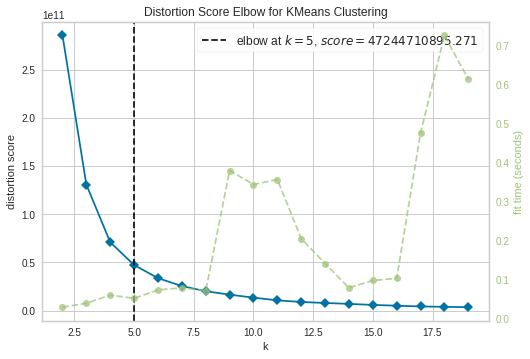

In [42]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df1) 
visualizer.poof() 

1. 4 clusters are enough for us. This number should be chosen with business knowledge.
2. We can increase or decrease depending on business knowledge.

In [43]:
df1["cluster_no"]=cluster
df1["cluster_no"]=df1["cluster_no"]+1
df1.head()

,Person,Age,Gender,Own Home,Married,Close,Salary,Children,Catalogs,cluster_no
South,1,1,0,0,0,1,16400,1,12,2
Midwest,2,2,0,1,1,0,108100,3,18,4
South,3,2,1,1,1,1,97300,1,12,4
East,4,3,1,1,1,1,26800,0,12,2
Midwest,5,1,1,0,0,1,11200,0,6,2


In [44]:
df1.groupby(by="cluster_no")['Salary'].agg(["min","mean","max"])

,min,mean,max
cluster_no,,,
1,61300,74415.185185,91000
2,10100,20191.071429,33700
3,34200,47775.165563,61000
4,91800,107636.486486,168800
